In [1]:
# import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# load the extracted feature dataset
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'convNet-2-dog-w-augment-2021-07-21/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "uncompressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 6275)


,0,1,2,3,4,5,6,7,8,9,...,6265,6266,6267,6268,6269,6270,6271,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,0.0,0.0,0.016211,0.0,0.291995,0.000000,0.146432,0.0,0.021637,0.117324,...,0.0,0.000000,0.324561,0.0,0.0,0.0,0.0,0.0,1,501.551020
-01-CON-D02-L.png,0.0,0.0,0.000000,0.0,0.438584,0.000000,0.967646,0.0,0.000000,0.000000,...,0.0,0.205997,0.347459,0.0,0.0,0.0,0.0,2.0,1,615.610652
-01-CON-D04-L.png,0.0,0.0,0.000000,0.0,0.637421,0.110172,0.361000,0.0,0.055045,0.000000,...,0.0,0.100205,0.396896,0.0,0.0,0.0,0.0,4.0,1,629.405482
-01-CON-D07-L.png,0.0,0.0,0.000000,0.0,0.575340,0.025159,0.322484,0.0,0.129195,0.000000,...,0.0,0.300293,0.549061,0.0,0.0,0.0,0.0,7.0,1,550.342936
-01-CON-D09-L.png,0.0,0.0,0.000000,0.0,0.389240,0.000000,0.784625,0.0,0.000000,0.000000,...,0.0,0.182934,0.308662,0.0,0.0,0.0,0.0,9.0,1,470.905718


In [3]:
# load the extracted feature dataset
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'convNet-dog-w-augment-2021-07-20/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "pca_compressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 407)


,0,1,2,3,4,5,6,7,8,9,...,397,398,399,400,401,402,403,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,-0.578288,-0.917540,0.512298,-0.404714,-0.835545,0.229360,-0.719140,0.0,1,532.897959
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,-0.054805,0.024469,0.103730,-0.001665,-0.082493,0.013053,-0.022224,2.0,1,623.140496
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,-0.099741,0.206386,0.118824,-0.223728,-0.003638,-0.318956,0.036588,4.0,1,630.687077
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,-0.208860,0.456164,0.045903,-0.008145,-0.009034,-0.078547,0.111962,7.0,1,528.806584
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,0.001314,0.032731,-0.055784,0.023959,-0.028428,-0.044563,-0.019482,9.0,1,476.235453


In [4]:
feature_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '397', '398', '399', '400', '401', '402', '403', 'Day', 'Dog_label',
       'Area_mm2'],
      dtype='object', length=407)

In [5]:
feature_data.index

Index(['-01-CON-D00-L.png', '-01-CON-D02-L.png', '-01-CON-D04-L.png',
       '-01-CON-D07-L.png', '-01-CON-D09-L.png', '-01-CON-D11-L.png',
       '-01-CON-D14-L.png', '-01-CON-D16-L.png', '-01-CON-D18-L.png',
       '-01-CON-D21-L.png',
       ...
       'rotate90-10-CON-D04-R.png', 'rotate90-10-CON-D07-R.png',
       'rotate90-10-CON-D09-R.png', 'rotate90-10-CON-D11-R.png',
       'rotate90-10-CON-D14-R.png', 'rotate90-10-CON-D16-R.png',
       'rotate90-10-CON-D18-R.png', 'rotate90-10-CON-D21-R.png',
       'rotate90-10-CON-D23-R.png', 'rotate90-10-CON-D25-R.png'],
      dtype='object', length=544)

In [6]:
feature_data.Dog_label.value_counts()

1     60
2     60
3     60
4     60
5     56
9     56
6     48
7     48
8     48
10    48
Name: Dog_label, dtype: int64

In [7]:
wound_area_df = feature_data[['Day', 'Dog_label', 'Area_mm2']]

for label in set(wound_area_df.Dog_label):
    #print(label)
    temp = wound_area_df[wound_area_df.Dog_label == label]['Area_mm2'].iloc[0]
    wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp

/tmp/ipykernel_3200673/3794090581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp


In [8]:
# Add the Area_precentage column back to feature dataset as a feature
feature_data['Area_precentage'] = wound_area_df['Area_precentage'].values
feature_data

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,-0.917540,0.512298,-0.404714,-0.835545,0.229360,-0.719140,0.0,1,532.897959,1.000000
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,0.024469,0.103730,-0.001665,-0.082493,0.013053,-0.022224,2.0,1,623.140496,1.169343
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,0.206386,0.118824,-0.223728,-0.003638,-0.318956,0.036588,4.0,1,630.687077,1.183504
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,0.456164,0.045903,-0.008145,-0.009034,-0.078547,0.111962,7.0,1,528.806584,0.992322
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,0.032731,-0.055784,0.023959,-0.028428,-0.044563,-0.019482,9.0,1,476.235453,0.893671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-5.098853,1.500281,-1.326878,-2.284112,0.945030,-5.951977,0.636958,-0.862498,-0.923928,-2.368094,...,-0.636517,0.136936,-0.161171,0.499262,-0.972255,-0.402906,16.0,10,78.114187,0.128275
rotate90-10-CON-D18-R.png,-4.733955,2.419480,-1.106264,-2.421438,-1.150180,-5.477267,1.716070,-1.610655,0.608819,-0.729589,...,0.140356,-0.781385,0.782499,0.175056,-1.482024,0.073253,18.0,10,50.236244,0.082495
rotate90-10-CON-D21-R.png,-6.206416,-0.367213,-1.329487,-2.281084,0.505521,-4.149320,1.832026,-0.454211,0.582477,-1.957041,...,0.218337,-0.132794,-0.175453,-0.153666,-0.254123,0.604041,21.0,10,33.306122,0.054693
rotate90-10-CON-D23-R.png,-6.417570,-1.795200,-1.006678,-0.320959,1.016383,-0.514877,1.097637,0.347069,0.571307,-0.669769,...,-0.912368,-0.382067,0.628334,0.593685,-0.524361,0.071756,23.0,10,23.615917,0.038781


# clinical data until heal data

In [9]:
clinical_path = './data/all_dog_wounds_noAugmentation/'
clinical_df = pd.read_csv(clinical_path+"wound_image_labels.csv")

print(clinical_df.loc[:,'Days_until_heal'])

0      37
1      35
2      33
3      30
4      28
       ..
131     9
132     7
133     4
134     2
135     0
Name: Days_until_heal, Length: 136, dtype: int64


In [10]:
wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4
#print(clinical_df.loc[:,'Days_until_heal'])

fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

/tmp/ipykernel_3200673/363155894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4


In [11]:
print(wound_area_df[wound_area_df.Dog_label == 5])
#print(wound_area_df[wound_area_df.Dog_label == 6])

                             Day  Dog_label    Area_mm2  Area_precentage  \
-05-CON-D02-L.png            2.0          5  714.080000         1.000000   
-05-CON-D04-L.png            4.0          5  664.803805         0.930993   
-05-CON-D07-L.png            7.0          5  493.066406         0.690492   
-05-CON-D09-L.png            9.0          5  233.457778         0.326935   
-05-CON-D11-L.png           11.0          5  113.848889         0.159434   
-05-CON-D14-L.png           14.0          5   49.826389         0.069777   
-05-CON-D16-L.png           16.0          5   32.979592         0.046185   
-05-CON-D18-L.png           18.0          5   22.328889         0.031269   
-05-CON-D21-L.png           21.0          5    9.574200         0.013408   
-05-CON-D23-L.png           23.0          5    0.000000         0.000000   
-05-CON-D25-L.png           25.0          5    0.000000         0.000000   
-05-CON-D28-L.png           28.0          5    0.000000         0.000000   
-05-CON-D30-

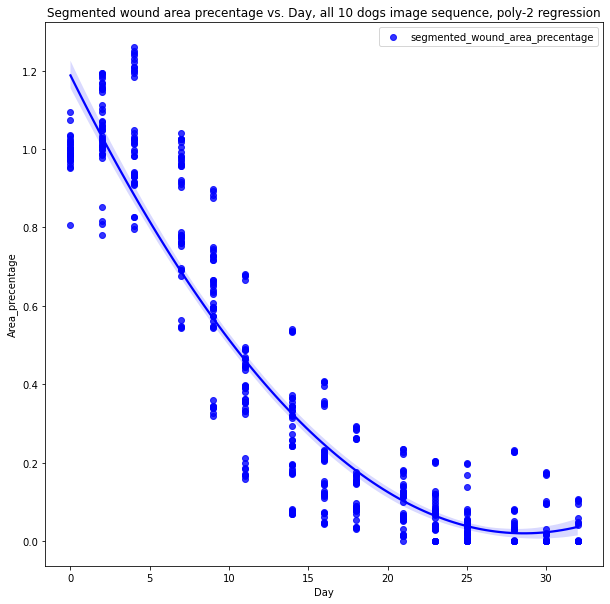

In [12]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Day', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Day, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

fig.savefig(fig_path + "Segmented wound area precentage vs. Day, all 10 dogs image sequence.png")

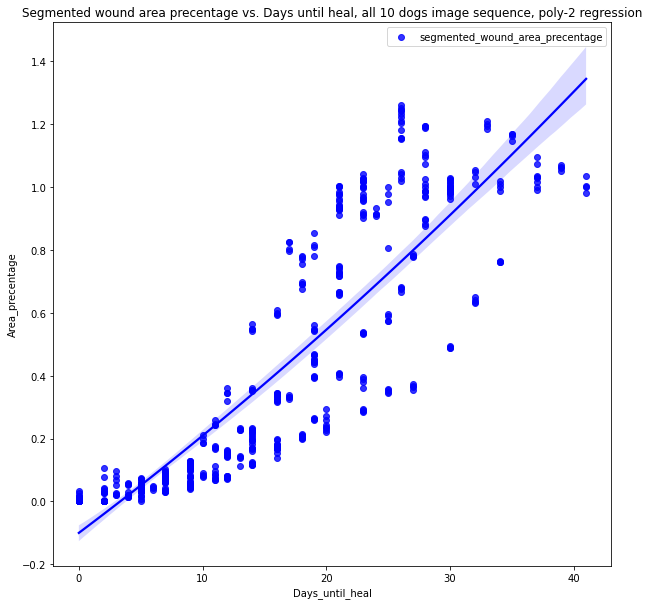

In [13]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Days_until_heal', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

fig.savefig(fig_path + "Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence.png")

## Separate training and test data set
1. Try use dog 9 and 10 as separate test image sequence
2. Try use the < 15 days image sequence as training input and > 15 days image sequence as test input (Tried, not working)


In [14]:
# manually set the random seed to define a replication
r_seed = 42

# manually set the number for cross validation
num_cv = 5

# manually set the test dog wound image sequences (9 or 10)
# [9, 10]
test_num = [9, 10]

print("current random seed is: ", r_seed)
print("current test wound image sequence is: ", test_num)

current random seed is:  42
current test wound image sequence is:  [9, 10]


In [15]:
# now combining feature data with class_feature.csv(fibrin, granulation, necrosis) that are extracted from model-1.
feature_data

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,-0.917540,0.512298,-0.404714,-0.835545,0.229360,-0.719140,0.0,1,532.897959,1.000000
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,0.024469,0.103730,-0.001665,-0.082493,0.013053,-0.022224,2.0,1,623.140496,1.169343
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,0.206386,0.118824,-0.223728,-0.003638,-0.318956,0.036588,4.0,1,630.687077,1.183504
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,0.456164,0.045903,-0.008145,-0.009034,-0.078547,0.111962,7.0,1,528.806584,0.992322
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,0.032731,-0.055784,0.023959,-0.028428,-0.044563,-0.019482,9.0,1,476.235453,0.893671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-5.098853,1.500281,-1.326878,-2.284112,0.945030,-5.951977,0.636958,-0.862498,-0.923928,-2.368094,...,-0.636517,0.136936,-0.161171,0.499262,-0.972255,-0.402906,16.0,10,78.114187,0.128275
rotate90-10-CON-D18-R.png,-4.733955,2.419480,-1.106264,-2.421438,-1.150180,-5.477267,1.716070,-1.610655,0.608819,-0.729589,...,0.140356,-0.781385,0.782499,0.175056,-1.482024,0.073253,18.0,10,50.236244,0.082495
rotate90-10-CON-D21-R.png,-6.206416,-0.367213,-1.329487,-2.281084,0.505521,-4.149320,1.832026,-0.454211,0.582477,-1.957041,...,0.218337,-0.132794,-0.175453,-0.153666,-0.254123,0.604041,21.0,10,33.306122,0.054693
rotate90-10-CON-D23-R.png,-6.417570,-1.795200,-1.006678,-0.320959,1.016383,-0.514877,1.097637,0.347069,0.571307,-0.669769,...,-0.912368,-0.382067,0.628334,0.593685,-0.524361,0.071756,23.0,10,23.615917,0.038781


In [16]:
class_feature = pd.read_csv('/home/aravind/Desktop/Aravind/smart_bandage/smart_bandage/Aravind/class_features.csv',index_col=None)
class_feature.drop(columns=['total'], inplace=True)
class_feature.sort_values(by=['image_name'],inplace=True,ignore_index=True)
class_feature

,Not_wound,Fibrin,Granulation,Necrosed,image_name
0,0.741798,0.183237,0.041212,0.033755,01-CON-D00-L.jpg
1,0.840166,0.097424,0.043218,0.019193,01-CON-D02-L.JPG
2,0.864317,0.117976,0.013426,0.004281,01-CON-D04-L.JPG
3,0.804517,0.111475,0.072172,0.011838,01-CON-D07-L.JPG
4,0.833030,0.092023,0.069762,0.005185,01-CON-D09-L.JPG
...,...,...,...,...,...
131,0.752738,0.176545,0.042196,0.028522,10-CON-D16-R.JPG
132,0.756946,0.183178,0.037439,0.022437,10-CON-D18-R.JPG
133,0.784885,0.158791,0.032941,0.023383,10-CON-D21-R.JPG
134,0.780616,0.173160,0.025812,0.020411,10-CON-D23-R.JPG


In [17]:
feature_data['Not_wound'] = list(class_feature['Not_wound'].values)*4
feature_data['Fibrin'] = list(class_feature['Fibrin'].values)*4
feature_data['Granulation'] = list(class_feature['Granulation'].values)*4
feature_data['Necrosed'] = list(class_feature['Necrosed'].values)*4

In [18]:
feature_data

,0,1,2,3,4,5,6,7,8,9,...,402,403,Day,Dog_label,Area_mm2,Area_precentage,Not_wound,Fibrin,Granulation,Necrosed
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,0.229360,-0.719140,0.0,1,532.897959,1.000000,0.741798,0.183237,0.041212,0.033755
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,0.013053,-0.022224,2.0,1,623.140496,1.169343,0.840166,0.097424,0.043218,0.019193
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,-0.318956,0.036588,4.0,1,630.687077,1.183504,0.864317,0.117976,0.013426,0.004281
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,-0.078547,0.111962,7.0,1,528.806584,0.992322,0.804517,0.111475,0.072172,0.011838
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,-0.044563,-0.019482,9.0,1,476.235453,0.893671,0.833030,0.092023,0.069762,0.005185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-5.098853,1.500281,-1.326878,-2.284112,0.945030,-5.951977,0.636958,-0.862498,-0.923928,-2.368094,...,-0.972255,-0.402906,16.0,10,78.114187,0.128275,0.752738,0.176545,0.042196,0.028522
rotate90-10-CON-D18-R.png,-4.733955,2.419480,-1.106264,-2.421438,-1.150180,-5.477267,1.716070,-1.610655,0.608819,-0.729589,...,-1.482024,0.073253,18.0,10,50.236244,0.082495,0.756946,0.183178,0.037439,0.022437
rotate90-10-CON-D21-R.png,-6.206416,-0.367213,-1.329487,-2.281084,0.505521,-4.149320,1.832026,-0.454211,0.582477,-1.957041,...,-0.254123,0.604041,21.0,10,33.306122,0.054693,0.784885,0.158791,0.032941,0.023383
rotate90-10-CON-D23-R.png,-6.417570,-1.795200,-1.006678,-0.320959,1.016383,-0.514877,1.097637,0.347069,0.571307,-0.669769,...,-0.524361,0.071756,23.0,10,23.615917,0.038781,0.780616,0.173160,0.025812,0.020411


In [19]:
wound_area_df

,Day,Dog_label,Area_mm2,Area_precentage,Days_until_heal
-01-CON-D00-L.png,0.0,1,532.897959,1.000000,37
-01-CON-D02-L.png,2.0,1,623.140496,1.169343,35
-01-CON-D04-L.png,4.0,1,630.687077,1.183504,33
-01-CON-D07-L.png,7.0,1,528.806584,0.992322,30
-01-CON-D09-L.png,9.0,1,476.235453,0.893671,28
...,...,...,...,...,...
rotate90-10-CON-D16-R.png,16.0,10,78.114187,0.128275,9
rotate90-10-CON-D18-R.png,18.0,10,50.236244,0.082495,7
rotate90-10-CON-D21-R.png,21.0,10,33.306122,0.054693,4
rotate90-10-CON-D23-R.png,23.0,10,23.615917,0.038781,2


In [128]:
# 1. use dog 9 and 10 as separate test image sequences, use dog 1-8 as training image sequences
#    Notice: dog 2 is a good example of chronic wound
#    Train data need to drop the Dog_label column, but save the Area_mm2 and Area_precentage columns as features
# Train
X_train = feature_data[feature_data['Dog_label'].isin(range(1,9))]
X_train = X_train.drop(['Dog_label'], axis = 1)
X_train = X_train.drop(['Day'], axis = 1)
print("The training dataset's shape is: ", X_train.shape)


#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
X_test = feature_data[feature_data['Dog_label'].isin(test_num)]
X_test = X_test.drop(['Dog_label'], axis = 1)
X_test = X_test.drop(['Day'], axis = 1)
print(X_test.shape)

# Label
Y_train = wound_area_df[wound_area_df['Dog_label'].isin(range(1,9))]
Y_train = Y_train['Days_until_heal']

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
Y_test = wound_area_df[wound_area_df['Dog_label'].isin(test_num)]
Y_test = Y_test['Days_until_heal']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 and 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
days_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Day']
#print("The test wound image sequence's days:\n", days_seq)

#Area_prop_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Area_precentage']
Area_prop_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Area_precentage']
#print("The test wound image sequence's Area proportion:\n", Area_prop_seq)

The training dataset's shape is:  (440, 410)
(104, 410)


In [129]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,Area_mm2,Area_precentage,Not_wound,Fibrin,Granulation,Necrosed
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,-0.404714,-0.835545,0.229360,-0.719140,532.897959,1.000000,0.741798,0.183237,0.041212,0.033755
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,-0.001665,-0.082493,0.013053,-0.022224,623.140496,1.169343,0.840166,0.097424,0.043218,0.019193
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,-0.223728,-0.003638,-0.318956,0.036588,630.687077,1.183504,0.864317,0.117976,0.013426,0.004281
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,-0.008145,-0.009034,-0.078547,0.111962,528.806584,0.992322,0.804517,0.111475,0.072172,0.011838
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,0.023959,-0.028428,-0.044563,-0.019482,476.235453,0.893671,0.833030,0.092023,0.069762,0.005185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-08-CON-D16-L.png,-3.081290,1.693855,-0.906959,-4.987440,-0.905609,-4.587822,1.253581,-0.507002,-2.038271,0.072458,...,-0.680221,0.620151,0.298692,0.129899,98.204444,0.203193,0.768544,0.151081,0.051375,0.029001
rotate90-08-CON-D18-L.png,-4.141303,2.568628,-0.796420,-4.218312,-1.236843,-5.081779,1.882266,-0.757617,-0.499288,-0.012710,...,-0.133265,-0.104232,0.273754,0.208080,79.187500,0.163846,0.738529,0.172214,0.053575,0.035679
rotate90-08-CON-D21-L.png,-4.947669,1.959306,0.172496,-2.731438,-1.760001,-3.985359,2.029962,-1.346701,0.808953,-0.656219,...,0.226115,-0.930471,0.537678,0.881776,59.695291,0.123515,0.751689,0.158993,0.057420,0.031898
rotate90-08-CON-D23-L.png,-5.390781,-0.178993,-0.835533,-3.358255,0.558885,-4.798068,0.960271,0.381534,-1.295127,-1.508643,...,-0.400336,-0.190871,-0.867471,0.128217,36.500000,0.075522,0.757108,0.153851,0.057946,0.031097


In [100]:
#from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
#scaler = StandardScaler()

# Fit on training data
#scaler.fit(X_train)

# Transform both training and test data
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)


### Full Deep Learning Code

In [130]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

seed_value = 42
python_random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


def create_mlp_model(optimizer='adam',learning_rate=0.001, activation='relu'):
    num_features = X_train.shape[1]
    model = Sequential([
        Dense(256, activation=activation, input_shape=(num_features,)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1)
    ])
    
    # Configure the optimizer with the learning rate
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
        
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor
model = KerasRegressor(build_fn=create_mlp_model, verbose=0)


/tmp/ipykernel_3200673/103766947.py:29: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_mlp_model, verbose=0)


In [131]:
from tensorflow.keras.optimizers import Adam

# Example of hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    #'neurons': [32, 64, 128, 256],
    'activation': ['relu', 'tanh'],
    'learning_rate':[0.1,0.001,0.0001],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100]
}


In [132]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,       # 3-fold cross-validation
    verbose=2,
    random_state=r_seed,
    scoring='r2'
)

random_search.fit(X_train, Y_train)
print(random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END activation=relu, batch_size=32, epochs=50, learning_rate=0.0001, optimizer=adam; total time=   1.2s
[CV] END activation=relu, batch_size=32, epochs=50, learning_rate=0.0001, optimizer=adam; total time=   1.1s
[CV] END activation=relu, batch_size=32, epochs=50, learning_rate=0.0001, optimizer=adam; total time=   1.2s
[CV] END activation=relu, batch_size=32, epochs=50, learning_rate=0.0001, optimizer=adam; total time=   1.1s
[CV] END activation=relu, batch_size=32, epochs=50, learning_rate=0.0001, optimizer=adam; total time=   1.2s
[CV] END activation=tanh, batch_size=128, epochs=50, learning_rate=0.001, optimizer=adam; total time=   0.7s
[CV] END activation=tanh, batch_size=128, epochs=50, learning_rate=0.001, optimizer=adam; total time=   0.7s
[CV] END activation=tanh, batch_size=128, epochs=50, learning_rate=0.001, optimizer=adam; total time=   0.7s
[CV] END activation=tanh, batch_size=128, epochs=50, learning_rate=

In [133]:
print(random_search.best_score_)

0.823443663234652


In [134]:
rs = random_search.best_estimator_
# Predicting on test data
test_predictions = rs.predict(X_test)

# Evaluate R2 score on test data
test_r2_score = r2_score(Y_test, test_predictions)
print("Test R2 Score:", test_r2_score)


Test R2 Score: 0.813194765049434


In [135]:
import tensorflow as tf
import sklearn

print("TensorFlow version:", tf.__version__)
print("Scikit-Learn version:", sklearn.__version__)


TensorFlow version: 2.9.1
Scikit-Learn version: 1.0.2


### END For Full Deep Learning Code